
https://github.com/Ajaypal91/Predicting-Price-of-Cryptocurrency

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re


import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt

import datetime
import sys
import scipy



### Read in Datasets

In [114]:
#Bitcoin and Altcoin Data all from the same Data Set
coin_Aave = pd.read_csv('coin_Aave.csv')
coin_BinanceCoin = pd.read_csv('coin_BinanceCoin.csv')
coin_BinanceCoin = pd.read_csv('coin_BinanceCoin.csv')
coin_Bitcoin = pd.read_csv('coin_Bitcoin.csv')
coin_Cardano = pd.read_csv('coin_Cardano.csv')
coin_ChainLink = pd.read_csv('coin_ChainLink.csv')
coin_Cosmos = pd.read_csv('coin_Cosmos.csv')
coin_CryptocomCoin = pd.read_csv('coin_CryptocomCoin.csv')
coin_Dogecoin = pd.read_csv('coin_Dogecoin.csv')
coin_EOS = pd.read_csv('coin_EOS.csv')
coin_Ethereum = pd.read_csv('coin_Ethereum.csv')
coin_Iota = pd.read_csv('coin_Iota.csv')
coin_Litecoin = pd.read_csv('coin_Litecoin.csv')
coin_Monero = pd.read_csv('coin_Monero.csv')
coin_NEM = pd.read_csv('coin_NEM.csv')
coin_Polkadot = pd.read_csv('coin_Polkadot.csv')
coin_Solana = pd.read_csv('coin_Solana.csv')
coin_Stellar = pd.read_csv('coin_Stellar.csv')
coin_Tether = pd.read_csv('coin_Tether.csv')
coin_Tron = pd.read_csv('coin_Tron.csv')
coin_Uniswap = pd.read_csv('coin_Uniswap.csv')
coin_WrappedBitcoin = pd.read_csv('coin_WrappedBitcoin.csv')
coin_USDCoin = pd.read_csv('coin_USDCoin.csv')
coin_XRP = pd.read_csv('coin_XRP.csv')

#This is a seperate Alt coin,
coin_drgn = pd.read_csv('price_drgn.csv')

#This is Monthly Gold Prices
gold = pd.read_csv('monthly_gold_prices.csv')

# Tesla Stock 
tsla = pd.read_csv("TSLA.csv")


### Functions for Data Cleaning and Organizing 

Some of these did not work out for me, but I thought I would keep the code in here in case I find a use for it later. 

In [115]:
# # I did not end up using these....but they may be helpful later

# def convert_date(df,column_date_name,column_price_name):
#     # Convert column with dates to datetime objects
#     df[column_date_name] = pd.to_datetime(df[column_date_name])

#     # Sort values by productId and startDtTime to ensure correct order
#     df.sort_values(by=[column_price_name,column_date_name], inplace=True)

#     # Drop the duplicates
#     df.drop_duplicates([column_price_name], keep='last', inplace=True)
    
#     return df

# coin_Bitcoin = convert_date(coin_Bitcoin,'Date','Close')
# coin_Ethereum = convert_date(coin_Ethereum,'Date','Close')

In [116]:
# # I did not end up using these....but they may be helpful later

# # This turns all the data from daily data into monthly data 
# def day_to_month(df):
#     df.set_index('Date', inplace=True)
#     df.index = pd.to_datetime(df.index)
#     df.sort_index()
#     df.resample('1M').mean()
#     return df

In [117]:
# Attempts to find difference in data both failed

# Method 1 - failed 
#pd.date_range(start = '2015-08-08 23:59:59', end = '2021-02-18 23:59:59' ).difference(coin_Bitcoin.index)


# Method 2 - failed 
#check_df = coin_Bitcoin.reindex(pd.date_range('2015-08-08 23:59:59', '2021-02-18 23:59:59')).isnull().all(1)
#check_df

### Explore the Data

In [118]:
# From the big dataset of altcoins and bitcoin prices
coin_Bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [119]:
coin_Ethereum.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [120]:
# Check to see if the shapes match
np.shape(coin_Bitcoin)

(2862, 10)

In [121]:
np.shape(coin_Ethereum)

(2031, 10)

#### They dont match so we have to what dates we can have start and end that both datasets cover

In [122]:
# What date did the bitcoin data begin? What date did the bitcoin data end?
print("Start : " + str(coin_Bitcoin['Date'][0]))
print ("End : " + str(coin_Bitcoin['Date'][len(coin_Bitcoin)-2:-1]))

Start : 2013-04-29 23:59:59
End : 2860    2021-02-26 23:59:59
Name: Date, dtype: object


In [123]:
# What date did the ethereum data start? When does it End?
print("Start : " + str(coin_Ethereum['Date'][0]))
print ("End : " + str(coin_Ethereum['Date'][len(coin_Ethereum)-2:-1]))

Start : 2015-08-08 23:59:59
End : 2029    2021-02-26 23:59:59
Name: Date, dtype: object


#### Find the index of start and end that fits Ethereum Data

In [124]:
# # This is the code WORKED, and helped to find the index of the start and end date that fall on the same data as Ethereum 

# # So, now we need to make Ethereum and Bitcoin Data sets start and end on the same day. 
# # Since ethereum start later we need to find the index of then the bitcoin start on that day and cut the dataset down. 
# coin_Bitcoin['Date'].loc[coin_Bitcoin['Date'] == '2015-08-08 23:59:59']
# coin_Bitcoin['Date'].loc[coin_Bitcoin['Date'] == '2021-02-18 23:59:59']
# # Okay, so the index is 831, ad the end is 2852 lets cut to down to fit.

In [125]:
start_index = 831
end_index = 2852

#This creates a new dataframs of just the date and closing price of bitcoin
coin_Bitcoin_Update = coin_Bitcoin[['Date','Close']].copy()
# This matches the start and end dates of the ethereum data set
coin_Bitcoin_Update = coin_Bitcoin_Update[start_index:end_index]

coin_Bitcoin_Update

,Date,Close
831,2015-08-08 23:59:59,260.997009
832,2015-08-09 23:59:59,265.083008
833,2015-08-10 23:59:59,264.470001
834,2015-08-11 23:59:59,270.385986
835,2015-08-12 23:59:59,266.376007
...,...,...
2847,2021-02-13 23:59:59,47105.517473
2848,2021-02-14 23:59:59,48717.290211
2849,2021-02-15 23:59:59,47945.056832
2850,2021-02-16 23:59:59,49199.871344


In [126]:
# Here we are updatting the "Date" column data to be datetime
coin_Bitcoin_Update.set_index('Date', inplace=True)
# Then set the index to the dat
coin_Bitcoin_Update.index = pd.to_datetime(coin_Bitcoin_Update.index)
# Make sure its sorted
coin_Bitcoin_Update.sort_index()
# This will take the mean of the data within one month and set it
coin_Bitcoin_Update = coin_Bitcoin_Update.resample('1M').mean()
coin_Bitcoin_Update

,Close
Date,
2015-08-31,241.751832
2015-09-30,233.595533
2015-10-31,264.855356
2015-11-30,348.883332
2015-12-31,424.464547
...,...
2020-10-31,11886.978148
2020-11-30,16645.757397
2020-12-31,21983.136914


In [128]:
coin_Ethereum.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [129]:
coin_Ethereum_Update = coin_Ethereum[['Date','Close']].copy()
# Here we are updatting the "Date" column data to be datetime
coin_Ethereum_Update.set_index('Date', inplace=True)
# Then set the index to the dat
coin_Ethereum_Update.index = pd.to_datetime(coin_Ethereum_Update.index)
# Make sure its sorted
coin_Ethereum_Update.sort_index()
# This will take the mean of the data within one month and set it
coin_Ethereum_Update = coin_Ethereum_Update.resample('1M').mean()
coin_Ethereum_Update

,Close
Date,
2015-08-31,1.259649
2015-09-30,0.988966
2015-10-31,0.661104
2015-11-30,0.931352
2015-12-31,0.886259
...,...
2020-10-31,376.222393
2020-11-30,486.144509
2020-12-31,622.488434


#### The datasets FIT!!!
Awesome, so now the ethereum and bitcon data start and end at the same time, and have the same number of row data because we took the mean of the month data. That way even if there are missing day values that have been average out in the month value. 

In [130]:
np.shape(coin_Ethereum_Update)

(67, 1)

In [131]:
np.shape(coin_Bitcoin_Update)

(67, 1)

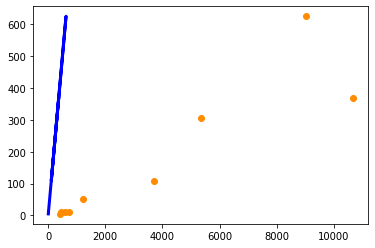

In [132]:
#This code was taken directly from 
# https://github.com/Ajaypal91/Predicting-Price-of-Cryptocurrency/blob/master/Models/linear_regression.py

msk = np.random.rand(len(coin_Bitcoin_Update)) < 0.8

X = coin_Bitcoin_Update["Close"]
Y = coin_Ethereum_Update["Close"]

X_train = np.array(X[msk]).reshape(len(X[msk]),1)
X_test = np.array(X[~msk]).reshape(len(X[~msk]),1)
Y_train = np.array(Y[msk]).reshape(len(X[msk]),1)
Y_test = np.array(Y[~msk]).reshape(len(X[~msk]),1)

clf = linear_model.LinearRegression()
clf.fit(X_train,Y_train)
predicted_vals = clf.predict(X_test)

plt.scatter(X_test, Y_test, color='darkorange', label='data')
plt.plot(Y_test, Y_test, color='blue', linewidth=3)
plt.show()

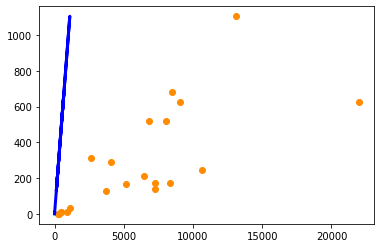

In [133]:

msk = np.random.rand(len(coin_Bitcoin_Update)) < 0.7

X = coin_Bitcoin_Update["Close"]
Y = coin_Ethereum_Update["Close"]

X_train = np.array(X[msk]).reshape(len(X[msk]),1)
X_test = np.array(X[~msk]).reshape(len(X[~msk]),1)
Y_train = np.array(Y[msk]).reshape(len(X[msk]),1)
Y_test = np.array(Y[~msk]).reshape(len(X[~msk]),1)

clf = linear_model.LinearRegression()
clf.fit(X_train,Y_train)
predicted_vals = clf.predict(X_test)

plt.scatter(X_test, Y_test, color='darkorange', label='data')
plt.plot(Y_test, Y_test, color='blue', linewidth=3)
plt.show()

In [ ]:
Well, these dont show anything thats very interesting.

In [ ]:
# Gold Price History 
gold.head()

In [ ]:
# This is an Alt Coin that I was interested in seeing (it was not in the big dataset)
coin_drgn

In [ ]:
# Making the datafram only the column data I am interested in
coin_drgn = coin_drgn[['date', 'CapMrktCurUSD', 'PriceUSD']].copy()
coin_drgn = coin_drgn.dropna()
coin_drgn

In [ ]:
# This is the TSLA dataset prices
tsla.head()

In [ ]:
tsla = tsla[['Date', 'Close', 'Volume']].copy()
tsla.dropna()
tsla.head()

In [ ]:
convert_date(coin_drgn,'date','PriceUSD')
coin_drgn.plot(x='date', y='PriceUSD', style='o')
coin_Bitcoin.plot(x="Date",y = "Close", style = '-')


In [ ]:
coin_drgn['date'].sort_values(ascending = True)

In [ ]:
plt.plot(coin_drgn['date'],coin_drgn['PriceUSD'], label = "Drgn")
plt.plot(coin_Bitcoin['Date'], coin_Bitcoin['Close'], label = "Bitcoin")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Two or more lines on same plot with suitable legends ')
plt.legend()
plt.show()

In [ ]:
coin_drgn

### Gold Price Prediction
https://github.com/pitagorinaunuka/Gold-Price-Prediction

If we wanted to look at gold versus bitcoin, I need to first fit the data together. The date for gold started in the year 1950, and is monthly data. So we need to make the dates based on months for bitcoin, and then only look at the gold prices during the same years as bitcoin. 

In [ ]:
# This turns all the data from daily data into monthly data 
coin_Bitcoin.set_index('Date', inplace=True)
coin_Bitcoin.index = pd.to_datetime(coin_Bitcoin.index)
coin_Bitcoin.resample('1M').mean()
coin_Bitcoin = coin_Bitcoin.drop('Volume',axis = 1)

In [ ]:
gold.set_index('Date', inplace=True)
gold.index = pd.to_datetime(gold.index)